Import

In [4]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.load_and_summarize import load_data, summarize_numerical, check_missing
from scripts.plotting import plot_histogram, plot_boxplot
from scripts.Loss_ratio import calculate_loss_ratio, loss_ratio_by_group

Load Data

In [5]:
df = load_data('../data/MachineLearningRating_v3.txt')
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


Data Summary

In [6]:
summary = summarize_numerical(df, ['TotalPremium', 'TotalClaims'])
missing = check_missing(df)
print(summary)
print(missing)

       TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00
max    6.528260e+04  3.930921e+05
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleTyp

Univariate Analysis

In [7]:
os.makedirs('reports', exist_ok=True)

plot_histogram(df, 'TotalClaims')
plot_boxplot(df, 'TotalPremium')

Bivariate Analysis

In [8]:
df = calculate_loss_ratio(df)
loss_ratio_by_group(df, 'Province')
loss_ratio_by_group(df, 'Gender')

Gender
Female           0.247919
Not specified    0.218548
Male             0.157443
Name: LossRatio, dtype: float64

Time Series Trend

<Axes: xlabel='TransactionMonth'>

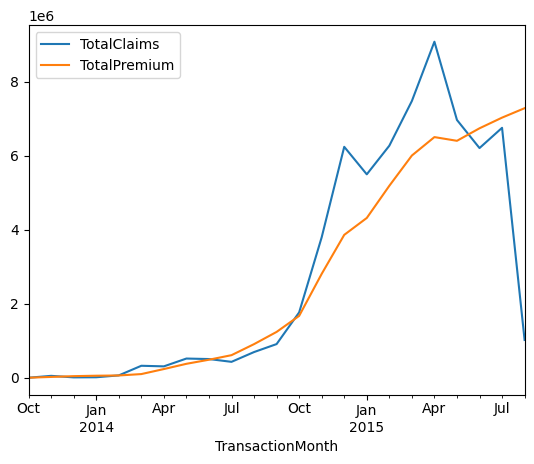

In [9]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
monthly = df.groupby(df['TransactionMonth'].dt.to_period("M"))[['TotalClaims', 'TotalPremium']].sum()
monthly.plot()

Save Outputs

In [10]:
plt.savefig('reports/loss_ratio_by_province.png')
plt.close()